# TP à rendre 1 quantification et échantillonage
Dans ce TP, nous aimerions transformer une image pseudo analogique en image numérique. 
L'image à coordonnées (x,y) réelles et valeurs d'amplitude f(x,y) réelles, devra être numérisée en:
- transformant d'abord les coordonnées en entiers 
- transformant ensuite les amplitudes en entiers

L'image pseudo analogique est contenue dans le fichier de données à loader.

# Importantion des librairies necessaires au travail

In [592]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lecture des fichiers d'amplitude et coordonnées

In [593]:
outfile1 = 'lines1.npy'
outfile2 = 'Cols1.npy'
outfile3 = 'amplitude1.npy'
lines=np.load(outfile1)
cols=np.load(outfile2)
amplitude=np.load(outfile3)

# Functions

In [594]:
def sampling(w,h,step):
    matrix = np.ones((h,w))
    for i in range(0,h,step):
        for j in range(0,w,step):
            x = int(lines[i]*h)
            y = int(cols[j]*w)
            matrix[x][y]=int(amplitude[x][y]*1000)
    return matrix

def createRange(min,max):
    offset = int(max / L)
    val_range = [[0,offset,0]]
    for i in range(2,L):
        val = [(i-1)*offset+1,i*offset,i-1]
        val_range.append(val)
    val = [(i)*offset+1,max,L-1]
    val_range.append(val)
    # for k in val_range:
    #     temp = format(k[2],"b")
    #     while len(temp) < 4 :
    #         temp = '0' + temp
    #     k[2] = temp
    return val_range
        
def codify(c,val_range):
    val = -1
    for i in range(len(val_range)) :
        if c >= val_range[i][0] and c <= val_range[i][1] :
            k = val_range[i]
            val = k[2]
            break
    return val 

# Echantillonage

In [595]:
# utiliser un saut pour l'échantillonage
step=2
# réaliser l'échantillonage
w = len(cols)
h = len(lines)
resultat = sampling(w,h,step)
print(resultat)

[[1000.    1. 1000. ...    1. 1000.    1.]
 [   1.    1.    1. ...    1.    1.    1.]
 [1000.    1. 1000. ...    1. 1000.    1.]
 ...
 [   1.    1.    1. ...    1.    1.    1.]
 [1000.    1. 1000. ...    1. 1000.    1.]
 [   1.    1.    1. ...    1.    1.    1.]]


# Quantification

In [596]:
nBits=4
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
#réaliser la quantification
min = resultat.min()
max = resultat.max()
val_range = createRange(min,max)
print(val_range)

for i in range(h):
    for j in range(w):
        c = codify(resultat[i][j],val_range)
        resultat[i][j] = c

[[0, 62, 0], [63, 124, 1], [125, 186, 2], [187, 248, 3], [249, 310, 4], [311, 372, 5], [373, 434, 6], [435, 496, 7], [497, 558, 8], [559, 620, 9], [621, 682, 10], [683, 744, 11], [745, 806, 12], [807, 868, 13], [869, 930, 14], [931, 1000.0, 15]]


# Afficher l'image résultante

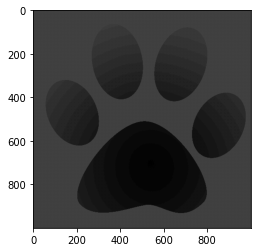

In [597]:
plt.imshow(resultat,cmap='gray')

# Sauvegarder l'image résultante

In [598]:
plt.imsave("résultat.png", resultat, cmap='gray')

# Lecture et affichage d'une autre image 


In [599]:
# lecture de l'image en niveau de gris
image = cv2.imread('toAdd.bmp',0)

In [600]:
# afficher avec opencv
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Réaliser les operations sur l'image

Addition des deux images

In [601]:
# additionner image et resultat
# si les deux images ne sont pas de même taille, 
# il faudra les redimensionner
# analyser les paramètres de redimensionnement

Negatif de l'image

In [602]:
# soustraire de 255 de chaque pixel 

# afficher l'image résultante
plt.imshow(imageN,cmap='gray')

NameError: name 'imageN' is not defined

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h

In [ ]:
# bonne chance